In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
from sklearn.datasets import fetch_lfw_people

In [96]:
img=fetch_lfw_people()
img.images.shape   # images attribute in img object having a numpy array

(13233, 62, 47)

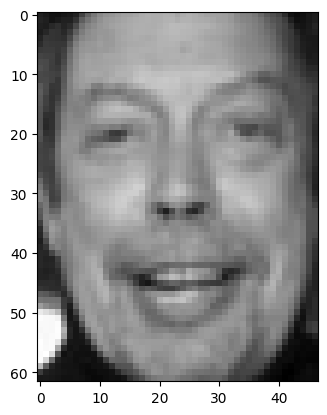

In [97]:
plt.imshow(img.images[0],cmap='gray')


In [98]:
# 62*47 =>  resize(4)= 62*4=248,47*4=228
img=fetch_lfw_people(min_faces_per_person=400,resize=4)
img.images.shape

(530, 500, 376)

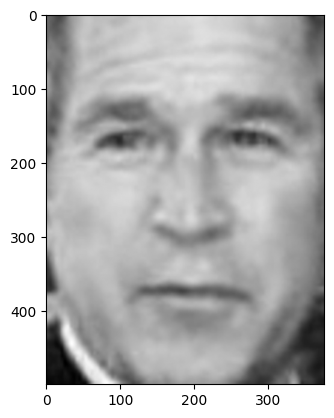

In [99]:
plt.imshow(img.images[0],cmap='gray')

In [100]:
# each image is a matrix of pixels so from matrix we convert it into a vector
# therefore convert it into a vector using flatten or reshape
# img.images[0].flatten().shape  or


In [101]:
indices=np.random.randint(0,530,size=100)
indices

array([ 72, 288, 290, 262, 180, 283, 391, 108, 358, 424, 236, 258,  25,
        77, 298, 311, 156, 521, 184, 250, 355, 305, 313,  36, 471, 325,
       232, 338, 167, 278, 189, 205, 287, 518, 436, 379, 416, 319, 236,
       343,  45, 444,  33, 499, 109, 161,  72, 364, 520,  59, 517,   8,
       215, 135, 294, 136, 222, 194,  66,  88,  33,  29, 502,  65, 202,
       151, 342, 159, 450, 228, 129, 130, 188, 496,  25, 287, 340, 327,
       237, 501, 452, 414,  57, 127, 307, 179, 350, 494, 202, 397, 337,
       524, 377, 141, 510, 239, 474, 139, 437,  32])

In [102]:
dataset=img.images[indices]
dataset.shape

(100, 500, 376)

In [103]:
V=dataset.reshape(100,-1)
V.shape

(100, 188000)

In [104]:
mu=V.sum(axis=0)/V.shape[0]
mu.shape

(188000,)

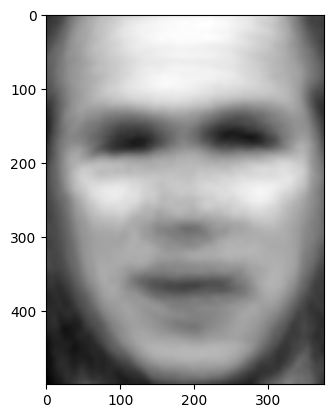

In [105]:
plt.imshow(mu.reshape(500,-1),cmap='gray')

In [106]:
X=V-mu
X.shape
X=X.T

In [107]:
#very high features use kernel pca
K=X.T@X
K.shape

(100, 100)

In [108]:
eval,evec=np.linalg.eigh(K)
# eval are asceding, evec i will be the ith col
for i in range(eval.shape[0]):
    if eval[i]<0:
      eval[i]=abs(eval[0])
eval

array([7.3894375e-04, 7.3894375e-04, 7.3894375e-04, 7.3894375e-04,
       1.7870794e-05, 2.1213286e-04, 6.1281159e-04, 8.4103149e+01,
       2.2713383e+02, 2.3168671e+02, 2.5244733e+02, 2.6949744e+02,
       2.7587845e+02, 2.9277908e+02, 2.9866837e+02, 3.1185455e+02,
       3.2152591e+02, 3.3805518e+02, 3.5817551e+02, 3.7560031e+02,
       3.8215543e+02, 4.0448340e+02, 4.1236932e+02, 4.2347260e+02,
       4.4764819e+02, 4.6438791e+02, 4.8680017e+02, 4.9282773e+02,
       5.0245700e+02, 5.3075238e+02, 5.3743219e+02, 5.4732849e+02,
       5.6479449e+02, 5.9177502e+02, 6.0868878e+02, 6.2857825e+02,
       6.3532611e+02, 6.8199146e+02, 6.9852258e+02, 7.1778381e+02,
       7.6462189e+02, 7.6858618e+02, 7.9310065e+02, 8.1807361e+02,
       8.2156213e+02, 8.8216479e+02, 9.1790692e+02, 9.3436060e+02,
       9.9686536e+02, 1.0349115e+03, 1.0615710e+03, 1.0855369e+03,
       1.1102279e+03, 1.1475730e+03, 1.2157876e+03, 1.2389889e+03,
       1.2906940e+03, 1.3516412e+03, 1.3661381e+03, 1.4010120e

In [109]:
eval=np.flip(eval)
eval
evec=np.flip(evec,axis=1)
evec.shape

(100, 100)

In [110]:
alpha= np.array([evec[:,i]/np.sqrt(eval[i]) for i in range(100)])
alpha.shape

(100, 100)

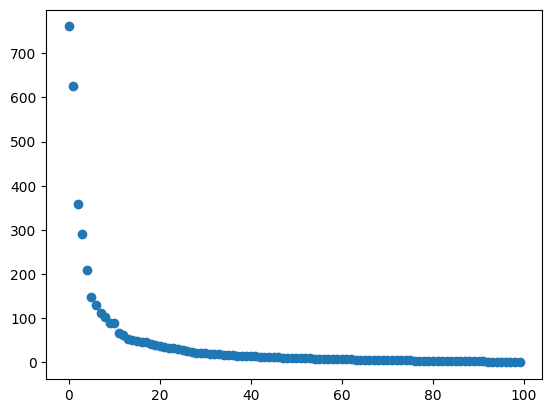

In [111]:
pcs=X@alpha
var=eval/100
sct=list(enumerate((var)))
sct=np.array(sct)
plt.scatter(sct[:,0],sct[:,1])

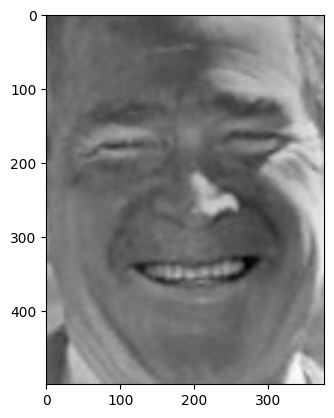

In [118]:
W=pcs[:,:1]
# print(W.shape)
# print(X.shape)
img1=X[:,7]

plt.imshow(img1.reshape(500,-1),cmap='gray')

In [119]:
temp=W.T@img1
rec1=W@temp

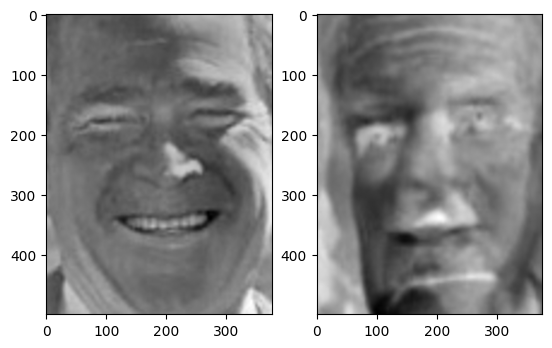

In [120]:
plt.subplot(1,2,1)
plt.imshow(img1.reshape(500,-1),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rec1.reshape(500,-1),cmap='gray')